In [1]:
import magnetic_boundaries as mb
import numpy as np
from scipy.ndimage import gaussian_filter
from math import pi
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, linalg as sla
import matplotlib.colors as mcolors


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Define color palette
rgb_colors = []
nplots = 3
for i in range(nplots):
    # Define HSV color
    hsv_color = (0.05+i/nplots, 0.8, 0.9) 
    # Convert to RGB
    rgb_colors.append(mcolors.hsv_to_rgb(hsv_color))

# Graphene

In [2]:
parameters = {
    'width' : 150, # This is in units of 3a
    'bottom_bearded' : True,
    'top_bearded' : False,
    'mag_field' : 0.0015
             }
#Calculate bands
momenta, bands = mb.graphene_bands(parameters, npoints = 501)

/tmp/ipykernel_98483/2124330591.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')


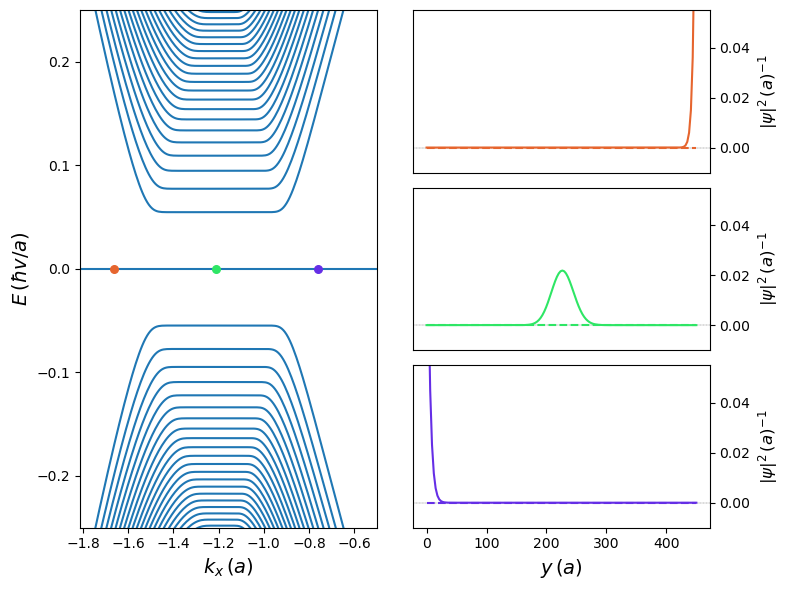

In [3]:
# Create figure
fig = plt.figure(figsize=(8, 6))  # Square figure

# Define grid layout: 2 columns, 3 rows
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

# Create subplots
ax = fig.add_subplot(gs[:, 0])
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i], c = 'C0')

ax.set_ylim(-0.25,0.25)
ax.set_xlim(-pi/np.sqrt(3),-0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a)$',fontsize = 14)

#Pinpoint states to plot
for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):

    #Calculate eignestates at kplot and plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[2]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):
    #Plot state
    axstate = fig.add_subplot(gs[i, 1])  # Top-right
    space = np.linspace(0,3*parameters['width'],parameters['width'])
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2\,(a)^{-1}$',fontsize = 12)
    axstate.set_ylim(-0.01, 0.055)
    if i == nplots-1:
        axstate.set_xlabel(r'$y\,(a)$',fontsize = 14)
    else:
        axstate.xaxis.set_visible(False)

    axstate.yaxis.set_ticks_position("right")  # Move ticks to the right
    axstate.yaxis.set_label_position("right")  # Move labels to the right

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    axstate.plot(space,np.abs(psi[0,:,0])**2 + np.abs(psi[2,:,0])**2,c = rgb_colors[i]) ## sublattice a
    axstate.plot(space,np.abs(psi[1,:,0])**2 + np.abs(psi[3,:,0])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice b

    # axstate.plot(space,np.abs(psi[0,:,0])**2 + np.abs(psi[2,:,0])**2+np.abs(psi[0,:,1])**2 + np.abs(psi[2,:,1])**2,c = rgb_colors[i]) ## sublattice a
    # axstate.plot(space,np.abs(psi[1,:,0])**2 + np.abs(psi[3,:,0])**2+np.abs(psi[1,:,1])**2 + np.abs(psi[3,:,1])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice b

    # axstate.plot(space,np.abs(psi[0,:,0])**2 + np.abs(psi[2,:,0])**2+np.abs(psi[0,:,1])**2 + np.abs(psi[2,:,1])**2+np.abs(psi[0,:,2])**2 + np.abs(psi[2,:,2])**2,c = rgb_colors[i]) ## sublattice a
    # axstate.plot(space,np.abs(psi[1,:,0])**2 + np.abs(psi[3,:,0])**2+np.abs(psi[1,:,1])**2 + np.abs(psi[3,:,1])**2+np.abs(psi[1,:,2])**2 + np.abs(psi[3,:,2])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice b


# Show the figure
plt.tight_layout()
plt.show()

#fig.savefig("graphene_zb.pdf", bbox_inches="tight")


# Tangent fermions

In [33]:
#zz is pi 0, 

parameters = dict(
    Lx = 1,
    Ly = 450,
    theta_top = 0,
    theta_bot = 0,
    mag_field = 0.0015,
    mass = 0,
)


nbands = 50
momenta, bands = mb.make_bands_x(parameters,number_of_bands = nbands, number_of_points = int(500), kmin = -pi/np.sqrt(3), kmax = pi/np.sqrt(3))

Text(0.5, 0, '$k_x\\,(a^{-1})$')

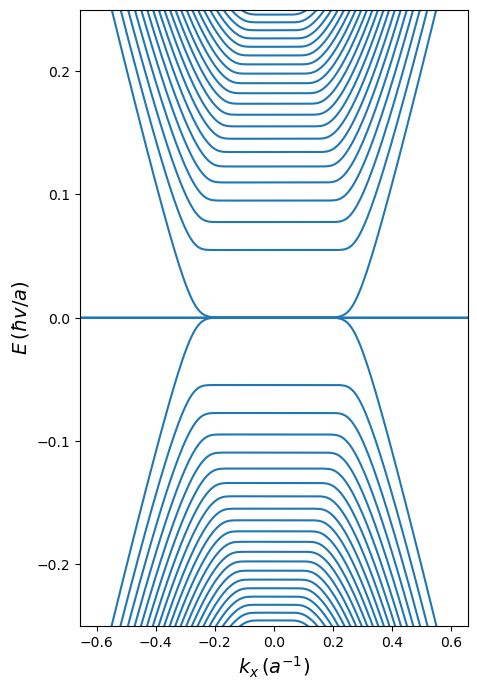

In [34]:
#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i], c = 'C0')

ax.set_ylim(-0.25,0.25)
ax.set_xlim(-(pi/np.sqrt(3)-0.5)/2,(pi/np.sqrt(3)-0.5)/2)
#ax.set_xlim(-0.5,0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1})$',fontsize = 14)


# ######These lines are useful to check units
# ax.axhline(np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################  First Landau level
# ax.axhline(-np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################
# ax.axline((0,0), slope=1, color='C2', label='by slope')######################################## Fermi velocity slope
# ax.axline((0,0), slope=-1, color='C2', label='by slope')########################################
# ax.axvline(parameters['Ly']*parameters['mag_field']/2, c = 'C3')######################## Skipping orbits centered the edge of the ribbon
# ax.axvline(-parameters['Ly']*parameters['mag_field']/2, c = 'C3')#######################
    
    
# fig.show()

/tmp/ipykernel_101965/3225600938.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_101965/3225600938.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_101965/3225600938.py:27: UserWa

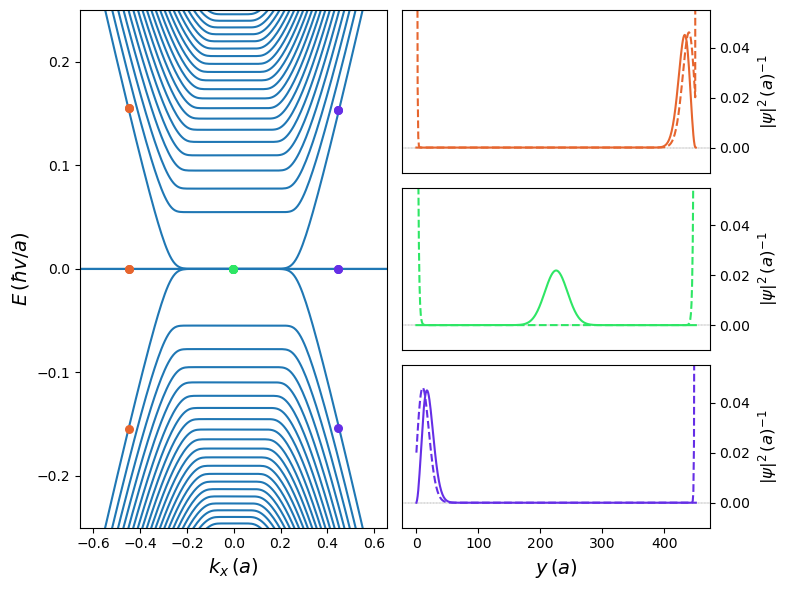

In [71]:
# Create figure
fig = plt.figure(figsize=(8, 6))  # Square figure

# Define grid layout: 2 columns, 3 rows
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

# Create subplots
ax = fig.add_subplot(gs[:, 0])
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i], c = 'C0')

ax.set_ylim(-0.25,0.25)
ax.set_xlim(-(pi/np.sqrt(3)-0.5)/2,(pi/np.sqrt(3)-0.5)/2)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a)$',fontsize = 14)

#Pinpoint states to plot
for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):

    #Calculate eignestates at kplot and plot.
    kplot = shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi, ind = mb.tangent_states(parameters, kplot,number_of_bands = int(6))

    ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    ax.scatter([momenta[k_idx]],[energies[2]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    ax.scatter([momenta[k_idx]],[energies[3]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

    ax.scatter([momenta[k_idx]],[energies[2]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):
    #Plot state
    axstate = fig.add_subplot(gs[i, 1])  # Top-right
    space = np.linspace(0,parameters['Ly']+1,parameters['Ly']+1)
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2\,(a)^{-1}$',fontsize = 12)
    axstate.set_ylim(-0.01, 0.055)
    if i == nplots-1:
        axstate.set_xlabel(r'$y\,(a)$',fontsize = 14)
    else:
        axstate.xaxis.set_visible(False)

    axstate.yaxis.set_ticks_position("right")  # Move ticks to the right
    axstate.yaxis.set_label_position("right")  # Move labels to the right

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi, ind = mb.tangent_states(parameters, kplot,number_of_bands = int(6))

    # axstate.plot(space,np.abs(psi[2,0,:])**2 ,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    # axstate.plot(space,np.abs(psi[2,1,:])**2 ,c = rgb_colors[i]) ## sublattice b

    # axstate.plot(space,np.abs(psi[0,0,:])**2 + np.abs(psi[1,0,:])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    # axstate.plot(space,np.abs(psi[0,1,:])**2 + np.abs(psi[1,1,:])**2,c = rgb_colors[i]) ## sublattice b
    
    # axstate.plot(space,np.abs(psi[0,0,:])**2 + np.abs(psi[1,0,:])**2 + np.abs(psi[2,0,:])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    # axstate.plot(space,np.abs(psi[0,1,:])**2 + np.abs(psi[1,1,:])**2 + np.abs(psi[2,1,:])**2,c = rgb_colors[i]) ## sublattice b
    
    axstate.plot(space,np.abs(psi[0,0,:])**2 + np.abs(psi[1,0,:])**2 + np.abs(psi[2,0,:])**2 + np.abs(psi[3,0,:])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[0,1,:])**2 + np.abs(psi[1,1,:])**2 + np.abs(psi[2,1,:])**2 + np.abs(psi[3,1,:])**2,c = rgb_colors[i]) ## sublattice b


# Show the figure
plt.tight_layout()
plt.show()

#fig.savefig("tangent_bz.pdf", bbox_inches="tight")

/tmp/ipykernel_101965/1698948329.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[check_state]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')


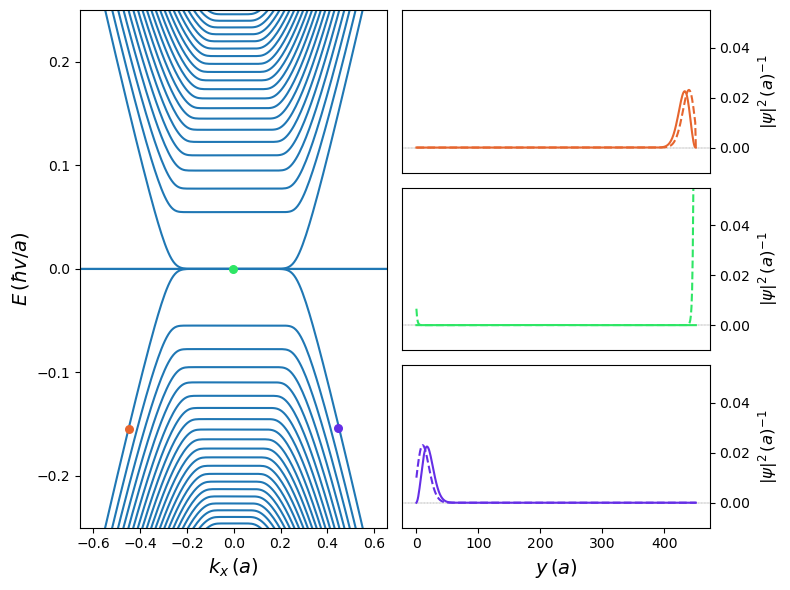

In [69]:
check_state = 2


# Create figure
fig = plt.figure(figsize=(8, 6))  # Square figure

# Define grid layout: 2 columns, 3 rows
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

# Create subplots
ax = fig.add_subplot(gs[:, 0])
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i], c = 'C0')

ax.set_ylim(-0.25,0.25)
ax.set_xlim(-(pi/np.sqrt(3)-0.5)/2,(pi/np.sqrt(3)-0.5)/2)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a)$',fontsize = 14)

#Pinpoint states to plot
for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):

    #Calculate eignestates at kplot and plot.
    kplot = shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi, ind = mb.tangent_states(parameters, kplot,number_of_bands = int(6))


    ax.scatter([momenta[k_idx]],[energies[check_state]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):
    #Plot state
    axstate = fig.add_subplot(gs[i, 1])  # Top-right
    space = np.linspace(0,parameters['Ly']+1,parameters['Ly']+1)
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2\,(a)^{-1}$',fontsize = 12)
    axstate.set_ylim(-0.01, 0.055)
    if i == nplots-1:
        axstate.set_xlabel(r'$y\,(a)$',fontsize = 14)
    else:
        axstate.xaxis.set_visible(False)

    axstate.yaxis.set_ticks_position("right")  # Move ticks to the right
    axstate.yaxis.set_label_position("right")  # Move labels to the right

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi, ind = mb.tangent_states(parameters, kplot,number_of_bands = int(6))

    axstate.plot(space,np.abs(psi[check_state,0,:])**2 ,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[check_state,1,:])**2 ,c = rgb_colors[i]) ## sublattice b


# Show the figure
plt.tight_layout()
plt.show()

# We can put both of them together

In [72]:
parameters = {
    'width' : 150, # This is in units of 3a
    'top_bearded' : False,
    'bottom_bearded' : False,
    #'mag_field' : 0.005
    'mag_field' : 0.0015
             }
#Calculate bands
momenta, bands = mb.graphene_bands(parameters, npoints = 500)
momenta_center = momenta - 2*np.sqrt(3)/3*np.ones(len(momenta))


mag_field = parameters['mag_field']
fluxes = mag_field*np.ones((3*parameters['width'],1))
a_e, a_n = mb.vector_potential(1,3*parameters['width'],fluxes, gauge = "Landau")

parameters_tan = dict(
    Lx = 1,
    Ly = 3*parameters['width'],
    theta_top = pi*(1-parameters['top_bearded']),
    theta_bot = pi*parameters['bottom_bearded'],
    a_e = a_e,
    a_n = a_n,
    mass = 0,
    mag_field = mag_field
)


nbands = 50
momenta_tan, bands_tan = mb.make_bands_x(parameters_tan,number_of_bands = nbands, number_of_points = int(500), kmin = -pi/np.sqrt(3), kmax = pi/np.sqrt(3))

In [73]:
manual_shift = 0.052
momenta_center = momenta + (2*np.sqrt(3)/3+manual_shift)*np.ones(len(momenta))

/tmp/ipykernel_101965/655368600.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


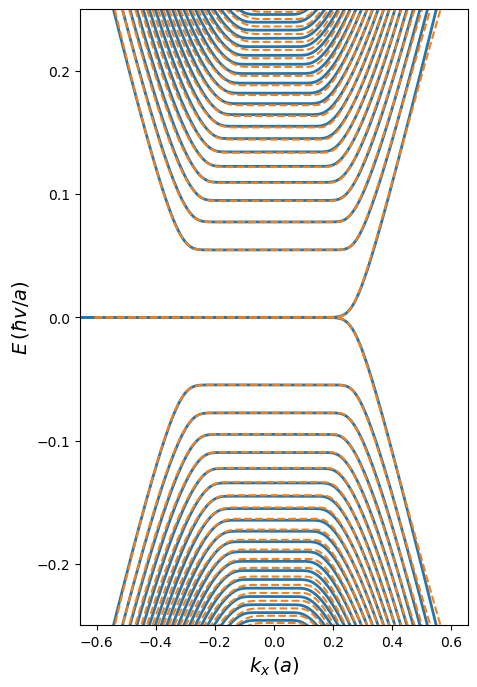

In [75]:
#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands_tan.shape[1]):
    ax.plot(momenta_tan,bands_tan[:,i], c = 'C0', lw = 2)

for i in range(bands.shape[1]):
    ax.plot(momenta_center,bands[:,i], c = 'C1',ls = 'dashed')

ax.set_ylim(-0.25,0.25)
ax.set_xlim(-(pi/np.sqrt(3)-0.5)/2,(pi/np.sqrt(3)-0.5)/2)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a)$',fontsize = 14)


# ######These lines are useful to check units
# ax.axhline(np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################  First Landau level
# ax.axhline(-np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################
# ax.axline((0,0), slope=1, color='C2', label='by slope')######################################## Fermi velocity slope
# ax.axline((0,0), slope=-1, color='C2', label='by slope')########################################
# ax.axvline(3*parameters['width']*parameters['mag_field']/2, c = 'C3')######################## Skipping orbits centered the edge of the ribbon
# ax.axvline(-3*parameters['width']*parameters['mag_field']/2, c = 'C3')#######################
    
    
fig.show()
#fig.savefig("both_zb.pdf", bbox_inches="tight")